In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.utils import shuffle
from keras.optimizers import RMSprop

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve,confusion_matrix,accuracy_score, auc

from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.preprocessing import StandardScaler

from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from imblearn.over_sampling import SVMSMOTE
from sklearn.model_selection import StratifiedKFold

Using TensorFlow backend.
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24

In [2]:
import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing, metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from keras import backend as K
from keras.models import Model
from keras.layers import Input, Dense, Lambda, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers
from sklearn.utils import shuffle



In [3]:
# Read the dataset
df = pd.read_csv('F:creditcard.csv')
#check on the size of the dataframe

test_split = 0.1 #portion of data used for testing
 #portion of training data used for validation
    
# We separate the feature vector from the classification result
X = df.drop('Class',axis=1).values
y = df['Class'].values

In [4]:
# Feature scaling
X -= X.min(axis=0)
X /= X.max(axis=0)

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Fold #1
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sk

After OverSampling, the shape of train_X: (379086, 30)
After OverSampling, the shape of train_y: (379086,) 

After OverSampling, counts of label '1': 189543
After OverSampling, counts of label '0': 189543
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 27)           837         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 27)           108         dense_1[0][0]                    
_____________________________________________________________________________________

379086/379086 [==============================] - 22s 57us/step - loss: 18.5173 - rec_loss: 29.9310 - kl_loss: 4.9235 - val_loss: 14.4672 - val_rec_loss: 25.1562 - val_kl_loss: 2.8709
Epoch 17/150
379086/379086 [==============================] - 22s 57us/step - loss: 18.4818 - rec_loss: 29.9247 - kl_loss: 4.9165 - val_loss: 14.7367 - val_rec_loss: 25.7773 - val_kl_loss: 2.8183
Epoch 18/150
379086/379086 [==============================] - 22s 57us/step - loss: 18.3191 - rec_loss: 29.6433 - kl_loss: 4.9257 - val_loss: 15.1301 - val_rec_loss: 26.5349 - val_kl_loss: 2.8652
Epoch 19/150
379086/379086 [==============================] - 22s 57us/step - loss: 18.1525 - rec_loss: 29.3424 - kl_loss: 4.9281 - val_loss: 14.4145 - val_rec_loss: 25.1418 - val_kl_loss: 2.8742
Epoch 20/150
379086/379086 [==============================] - 22s 58us/step - loss: 18.8360 - rec_loss: 30.7315 - kl_loss: 4.9227 - val_loss: 14.7871 - val_rec_loss: 25.7861 - val_kl_loss: 2.9154
Epoch 21/150
379086/379086 [=====

Epoch 58/150
379086/379086 [==============================] - 22s 58us/step - loss: 16.9421 - rec_loss: 27.1224 - kl_loss: 5.0454 - val_loss: 13.8921 - val_rec_loss: 23.9632 - val_kl_loss: 3.0597
Epoch 59/150
379086/379086 [==============================] - 22s 57us/step - loss: 17.0925 - rec_loss: 27.3492 - kl_loss: 5.1064 - val_loss: 13.7384 - val_rec_loss: 23.6833 - val_kl_loss: 3.0187
Epoch 60/150
379086/379086 [==============================] - 22s 58us/step - loss: 17.0464 - rec_loss: 27.2806 - kl_loss: 5.0750 - val_loss: 14.0632 - val_rec_loss: 24.3097 - val_kl_loss: 3.0298
Epoch 61/150
379086/379086 [==============================] - 22s 58us/step - loss: 17.1066 - rec_loss: 27.3693 - kl_loss: 5.1060 - val_loss: 14.1392 - val_rec_loss: 24.5453 - val_kl_loss: 2.9446
Epoch 62/150
379086/379086 [==============================] - 22s 58us/step - loss: 16.7435 - rec_loss: 26.7023 - kl_loss: 5.0576 - val_loss: 13.6572 - val_rec_loss: 23.5582 - val_kl_loss: 2.9778
Epoch 63/150
379086/

Epoch 100/150
379086/379086 [==============================] - 22s 57us/step - loss: 18.3226 - rec_loss: 29.7124 - kl_loss: 5.1655 - val_loss: 13.7074 - val_rec_loss: 23.5784 - val_kl_loss: 3.0055
Epoch 101/150
379086/379086 [==============================] - 22s 57us/step - loss: 18.6227 - rec_loss: 30.2761 - kl_loss: 5.1568 - val_loss: 13.8244 - val_rec_loss: 23.6569 - val_kl_loss: 3.1090
Epoch 102/150
379086/379086 [==============================] - 22s 57us/step - loss: 18.1092 - rec_loss: 29.2494 - kl_loss: 5.1627 - val_loss: 13.7038 - val_rec_loss: 23.5437 - val_kl_loss: 2.9986
Epoch 103/150
379086/379086 [==============================] - 22s 57us/step - loss: 18.0675 - rec_loss: 29.1716 - kl_loss: 5.1548 - val_loss: 14.0059 - val_rec_loss: 24.2378 - val_kl_loss: 2.8901
Epoch 104/150
379086/379086 [==============================] - 22s 57us/step - loss: 18.6390 - rec_loss: 30.2104 - kl_loss: 5.1892 - val_loss: 14.7351 - val_rec_loss: 25.4452 - val_kl_loss: 3.0608
Epoch 105/150
3

379086/379086 [==============================] - 22s 57us/step - loss: 16.2818 - rec_loss: 25.8224 - kl_loss: 5.1059 - val_loss: 13.8701 - val_rec_loss: 23.9875 - val_kl_loss: 3.0189
Epoch 142/150
379086/379086 [==============================] - 21s 57us/step - loss: 16.2993 - rec_loss: 25.8651 - kl_loss: 5.1045 - val_loss: 13.8286 - val_rec_loss: 23.9023 - val_kl_loss: 3.0144
Epoch 143/150
379086/379086 [==============================] - 22s 57us/step - loss: 16.2133 - rec_loss: 25.7077 - kl_loss: 5.0991 - val_loss: 13.8613 - val_rec_loss: 24.1032 - val_kl_loss: 2.8755
Epoch 144/150
379086/379086 [==============================] - 22s 58us/step - loss: 16.2325 - rec_loss: 25.7378 - kl_loss: 5.1053 - val_loss: 13.7335 - val_rec_loss: 23.7554 - val_kl_loss: 2.9605
Epoch 145/150
379086/379086 [==============================] - 22s 57us/step - loss: 16.4458 - rec_loss: 26.1439 - kl_loss: 5.1213 - val_loss: 14.1639 - val_rec_loss: 24.4494 - val_kl_loss: 3.1206
Epoch 146/150
379086/379086 [

Epoch 42/50
379086/379086 [==============================] - 78s 207us/step - loss: 0.0351 - accuracy: 0.9870 - val_loss: 0.0325 - val_accuracy: 0.9847
Epoch 43/50
379086/379086 [==============================] - 77s 204us/step - loss: 0.0351 - accuracy: 0.9869 - val_loss: 0.0336 - val_accuracy: 0.9840
Epoch 44/50
379086/379086 [==============================] - 77s 204us/step - loss: 0.0351 - accuracy: 0.9868 - val_loss: 0.0300 - val_accuracy: 0.9855
Epoch 45/50
379086/379086 [==============================] - 79s 207us/step - loss: 0.0351 - accuracy: 0.9869 - val_loss: 0.0318 - val_accuracy: 0.9847
Epoch 46/50
379086/379086 [==============================] - 79s 208us/step - loss: 0.0355 - accuracy: 0.9870 - val_loss: 0.0297 - val_accuracy: 0.9860
Epoch 47/50
379086/379086 [==============================] - 79s 207us/step - loss: 0.0353 - accuracy: 0.9871 - val_loss: 0.0293 - val_accuracy: 0.9864
Epoch 48/50
379086/379086 [==============================] - 78s 207us/step - loss: 0.03

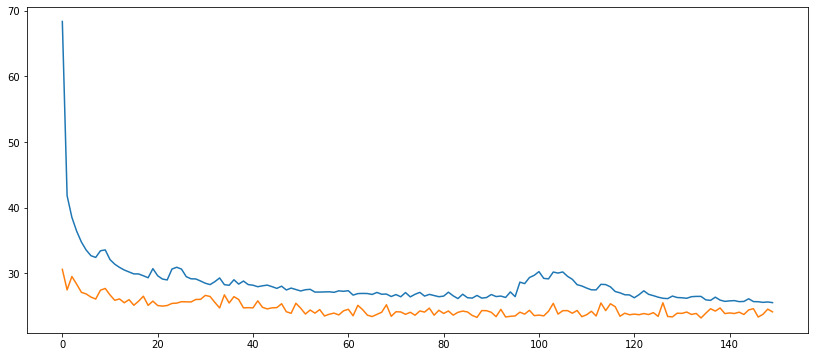

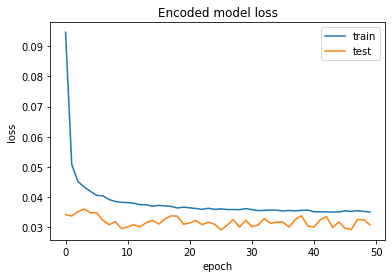

Overall accuracy of Convolutional Neural Network model: 0.9853374905199292


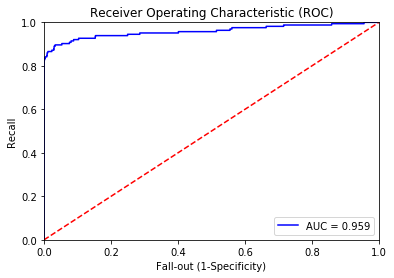

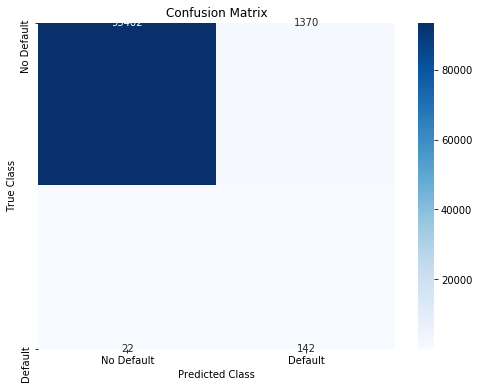

AUC(ROC): 0.9256989560567955
Precision: 0.09391534391534391
Recall: 0.8658536585365854
F1 score: 0.16945107398568018
False positives: 1370
True positives: 142
False negatives: 22
True negatives: 93402
Fold #2
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sk

After OverSampling, the shape of train_X: (379086, 30)
After OverSampling, the shape of train_y: (379086,) 

After OverSampling, counts of label '1': 189543
After OverSampling, counts of label '0': 189543
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 27)           837         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_12 (BatchNo (None, 27)           108         dense_10[0][0]                   
_____________________________________________________________________________________

379086/379086 [==============================] - 23s 60us/step - loss: 18.0836 - rec_loss: 29.1842 - kl_loss: 4.8439 - val_loss: 14.1314 - val_rec_loss: 24.5606 - val_kl_loss: 2.8713
Epoch 17/150
379086/379086 [==============================] - 23s 59us/step - loss: 18.2551 - rec_loss: 29.5530 - kl_loss: 4.8324 - val_loss: 15.1577 - val_rec_loss: 26.6644 - val_kl_loss: 2.8261
Epoch 18/150
379086/379086 [==============================] - 22s 59us/step - loss: 18.0672 - rec_loss: 29.1657 - kl_loss: 4.8576 - val_loss: 14.0875 - val_rec_loss: 24.4806 - val_kl_loss: 2.8713
Epoch 19/150
379086/379086 [==============================] - 23s 60us/step - loss: 18.2304 - rec_loss: 29.5025 - kl_loss: 4.8636 - val_loss: 14.0443 - val_rec_loss: 24.4880 - val_kl_loss: 2.7825
Epoch 20/150
379086/379086 [==============================] - 23s 60us/step - loss: 18.0571 - rec_loss: 29.1665 - kl_loss: 4.8576 - val_loss: 14.3573 - val_rec_loss: 25.1474 - val_kl_loss: 2.7505
Epoch 21/150
379086/379086 [=====

Epoch 58/150
379086/379086 [==============================] - 22s 58us/step - loss: 16.9731 - rec_loss: 27.0702 - kl_loss: 4.9547 - val_loss: 14.9930 - val_rec_loss: 26.2940 - val_kl_loss: 2.9087
Epoch 59/150
379086/379086 [==============================] - 22s 58us/step - loss: 17.1315 - rec_loss: 27.3847 - kl_loss: 4.9572 - val_loss: 14.5829 - val_rec_loss: 25.4440 - val_kl_loss: 2.9132
Epoch 60/150
379086/379086 [==============================] - 22s 58us/step - loss: 17.0902 - rec_loss: 27.2883 - kl_loss: 4.9610 - val_loss: 14.1780 - val_rec_loss: 24.6237 - val_kl_loss: 2.9347
Epoch 61/150
379086/379086 [==============================] - 22s 58us/step - loss: 16.9898 - rec_loss: 27.0928 - kl_loss: 4.9560 - val_loss: 14.3341 - val_rec_loss: 24.9903 - val_kl_loss: 2.8754
Epoch 62/150
379086/379086 [==============================] - 22s 58us/step - loss: 17.0163 - rec_loss: 27.1599 - kl_loss: 4.9525 - val_loss: 13.9641 - val_rec_loss: 24.2257 - val_kl_loss: 2.9050
Epoch 63/150
379086/

Epoch 100/150
379086/379086 [==============================] - 22s 59us/step - loss: 16.5237 - rec_loss: 26.2427 - kl_loss: 5.0366 - val_loss: 13.7301 - val_rec_loss: 23.7982 - val_kl_loss: 2.9239
Epoch 101/150
379086/379086 [==============================] - 22s 59us/step - loss: 16.5609 - rec_loss: 26.3286 - kl_loss: 5.0339 - val_loss: 14.1815 - val_rec_loss: 24.5239 - val_kl_loss: 3.0809
Epoch 102/150
379086/379086 [==============================] - 22s 59us/step - loss: 16.5204 - rec_loss: 26.2380 - kl_loss: 5.0366 - val_loss: 13.7572 - val_rec_loss: 23.7779 - val_kl_loss: 2.9814
Epoch 103/150
379086/379086 [==============================] - 22s 59us/step - loss: 16.5780 - rec_loss: 26.3585 - kl_loss: 5.0383 - val_loss: 13.9557 - val_rec_loss: 24.1626 - val_kl_loss: 3.0010
Epoch 104/150
379086/379086 [==============================] - 22s 59us/step - loss: 16.4999 - rec_loss: 26.2105 - kl_loss: 5.0400 - val_loss: 14.0803 - val_rec_loss: 24.3950 - val_kl_loss: 3.0292
Epoch 105/150
3

379086/379086 [==============================] - 22s 58us/step - loss: 16.4501 - rec_loss: 26.2127 - kl_loss: 5.0892 - val_loss: 13.6280 - val_rec_loss: 23.4164 - val_kl_loss: 3.1359
Epoch 142/150
379086/379086 [==============================] - 22s 59us/step - loss: 16.8578 - rec_loss: 26.9931 - kl_loss: 5.1110 - val_loss: 13.9926 - val_rec_loss: 24.0916 - val_kl_loss: 3.1868
Epoch 143/150
379086/379086 [==============================] - 22s 59us/step - loss: 16.4682 - rec_loss: 26.2486 - kl_loss: 5.0873 - val_loss: 13.8916 - val_rec_loss: 24.0688 - val_kl_loss: 3.0032
Epoch 144/150
379086/379086 [==============================] - 22s 59us/step - loss: 16.4521 - rec_loss: 26.2139 - kl_loss: 5.0904 - val_loss: 13.7033 - val_rec_loss: 23.7316 - val_kl_loss: 2.9697
Epoch 145/150
379086/379086 [==============================] - 22s 59us/step - loss: 16.4072 - rec_loss: 26.1290 - kl_loss: 5.0892 - val_loss: 13.8832 - val_rec_loss: 23.9228 - val_kl_loss: 3.1275
Epoch 146/150
379086/379086 [

Epoch 42/50
379086/379086 [==============================] - 80s 210us/step - loss: 0.0510 - accuracy: 0.9846 - val_loss: 0.0384 - val_accuracy: 0.9907
Epoch 43/50
379086/379086 [==============================] - 80s 212us/step - loss: 0.0511 - accuracy: 0.9844 - val_loss: 0.0402 - val_accuracy: 0.9899
Epoch 44/50
379086/379086 [==============================] - 80s 211us/step - loss: 0.0510 - accuracy: 0.9845 - val_loss: 0.0426 - val_accuracy: 0.9891
Epoch 45/50
379086/379086 [==============================] - 80s 211us/step - loss: 0.0508 - accuracy: 0.9846 - val_loss: 0.0450 - val_accuracy: 0.9887
Epoch 46/50
379086/379086 [==============================] - 80s 211us/step - loss: 0.0510 - accuracy: 0.9846 - val_loss: 0.0462 - val_accuracy: 0.9892
Epoch 47/50
379086/379086 [==============================] - 80s 212us/step - loss: 0.0508 - accuracy: 0.9846 - val_loss: 0.0409 - val_accuracy: 0.9903
Epoch 48/50
379086/379086 [==============================] - 80s 210us/step - loss: 0.05

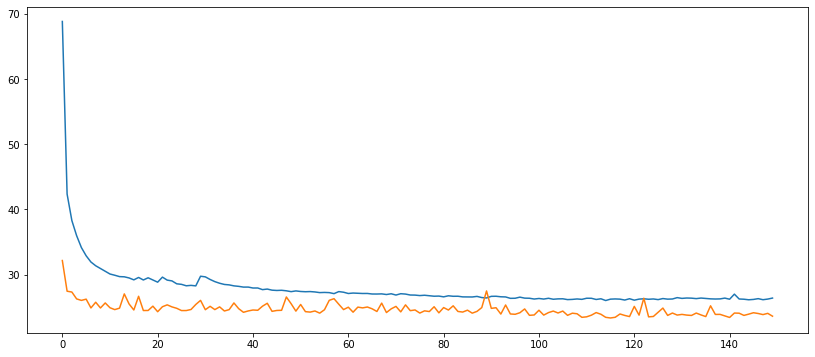

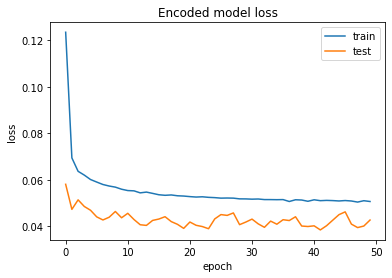

Overall accuracy of Convolutional Neural Network model: 0.9897615235527092


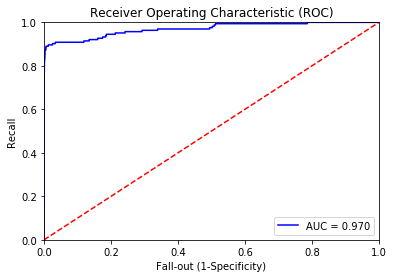

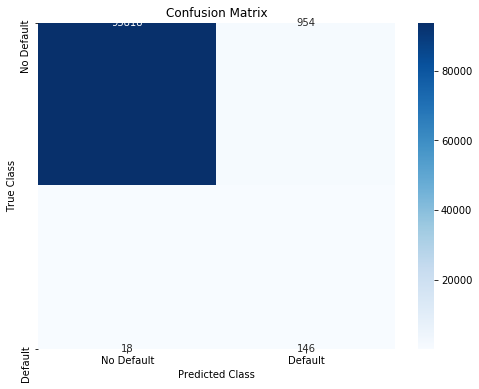

AUC(ROC): 0.9400888190707762
Precision: 0.13272727272727272
Recall: 0.8902439024390244
F1 score: 0.23101265822784808
False positives: 954
True positives: 146
False negatives: 18
True negatives: 93818
Fold #3
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sk

After OverSampling, the shape of train_X: (379088, 30)
After OverSampling, the shape of train_y: (379088,) 

After OverSampling, counts of label '1': 189544
After OverSampling, counts of label '0': 189544
Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 27)           837         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_23 (BatchNo (None, 27)           108         dense_19[0][0]                   
_____________________________________________________________________________________

379088/379088 [==============================] - 22s 59us/step - loss: 17.9842 - rec_loss: 29.4247 - kl_loss: 4.7013 - val_loss: 14.0599 - val_rec_loss: 24.5302 - val_kl_loss: 2.7006
Epoch 17/150
379088/379088 [==============================] - 22s 58us/step - loss: 17.9676 - rec_loss: 29.4209 - kl_loss: 4.7027 - val_loss: 13.9669 - val_rec_loss: 24.3919 - val_kl_loss: 2.6840
Epoch 18/150
379088/379088 [==============================] - 22s 58us/step - loss: 18.1127 - rec_loss: 29.7177 - kl_loss: 4.7050 - val_loss: 13.8720 - val_rec_loss: 24.1510 - val_kl_loss: 2.7477
Epoch 19/150
379088/379088 [==============================] - 22s 59us/step - loss: 17.9277 - rec_loss: 29.3855 - kl_loss: 4.7150 - val_loss: 13.9224 - val_rec_loss: 24.1913 - val_kl_loss: 2.8251
Epoch 20/150
379088/379088 [==============================] - 22s 59us/step - loss: 17.6755 - rec_loss: 28.9416 - kl_loss: 4.7079 - val_loss: 14.0370 - val_rec_loss: 24.4700 - val_kl_loss: 2.8018
Epoch 21/150
379088/379088 [=====

Epoch 58/150
379088/379088 [==============================] - 22s 58us/step - loss: 16.3376 - rec_loss: 26.5438 - kl_loss: 4.7948 - val_loss: 13.4734 - val_rec_loss: 23.4660 - val_kl_loss: 2.8646
Epoch 59/150
379088/379088 [==============================] - 22s 58us/step - loss: 16.3881 - rec_loss: 26.6257 - kl_loss: 4.8028 - val_loss: 13.6491 - val_rec_loss: 23.8948 - val_kl_loss: 2.7973
Epoch 60/150
379088/379088 [==============================] - 22s 58us/step - loss: 16.9232 - rec_loss: 27.6937 - kl_loss: 4.8004 - val_loss: 13.6091 - val_rec_loss: 23.8158 - val_kl_loss: 2.7865
Epoch 61/150
379088/379088 [==============================] - 22s 59us/step - loss: 16.3113 - rec_loss: 26.4905 - kl_loss: 4.7906 - val_loss: 13.4958 - val_rec_loss: 23.5448 - val_kl_loss: 2.8324
Epoch 62/150
379088/379088 [==============================] - 22s 58us/step - loss: 16.5736 - rec_loss: 27.0037 - kl_loss: 4.8029 - val_loss: 13.6796 - val_rec_loss: 23.9046 - val_kl_loss: 2.8310
Epoch 63/150
379088/

Epoch 100/150
379088/379088 [==============================] - 21s 56us/step - loss: 19.4052 - rec_loss: 32.3852 - kl_loss: 4.9636 - val_loss: 15.2854 - val_rec_loss: 26.8197 - val_kl_loss: 2.9815
Epoch 101/150
379088/379088 [==============================] - 21s 56us/step - loss: 17.5791 - rec_loss: 28.8033 - kl_loss: 4.8917 - val_loss: 13.4897 - val_rec_loss: 23.3391 - val_kl_loss: 2.9219
Epoch 102/150
379088/379088 [==============================] - 21s 56us/step - loss: 17.2768 - rec_loss: 28.2631 - kl_loss: 4.8749 - val_loss: 13.4573 - val_rec_loss: 23.3211 - val_kl_loss: 2.8938
Epoch 103/150
379088/379088 [==============================] - 21s 56us/step - loss: 18.9056 - rec_loss: 31.4734 - kl_loss: 4.8811 - val_loss: 13.5407 - val_rec_loss: 23.4960 - val_kl_loss: 2.8398
Epoch 104/150
379088/379088 [==============================] - 21s 57us/step - loss: 16.8397 - rec_loss: 27.4186 - kl_loss: 4.8495 - val_loss: 13.4469 - val_rec_loss: 23.3105 - val_kl_loss: 2.8823
Epoch 105/150
3

379088/379088 [==============================] - 22s 58us/step - loss: 16.9551 - rec_loss: 27.6626 - kl_loss: 4.8975 - val_loss: 13.5332 - val_rec_loss: 23.2769 - val_kl_loss: 3.0951
Epoch 142/150
379088/379088 [==============================] - 22s 57us/step - loss: 16.7956 - rec_loss: 27.3197 - kl_loss: 4.9218 - val_loss: 14.1279 - val_rec_loss: 24.5008 - val_kl_loss: 3.0382
Epoch 143/150
379088/379088 [==============================] - 22s 58us/step - loss: 16.7389 - rec_loss: 27.2093 - kl_loss: 4.9172 - val_loss: 13.6822 - val_rec_loss: 23.8556 - val_kl_loss: 2.7863
Epoch 144/150
379088/379088 [==============================] - 22s 58us/step - loss: 16.6555 - rec_loss: 27.0616 - kl_loss: 4.9051 - val_loss: 13.6141 - val_rec_loss: 23.6957 - val_kl_loss: 2.8286
Epoch 145/150
379088/379088 [==============================] - 22s 58us/step - loss: 16.7525 - rec_loss: 27.2081 - kl_loss: 4.9370 - val_loss: 13.5631 - val_rec_loss: 23.4729 - val_kl_loss: 2.9567
Epoch 146/150
379088/379088 [

Epoch 42/50
379088/379088 [==============================] - 82s 216us/step - loss: 0.0476 - accuracy: 0.9842 - val_loss: 0.0441 - val_accuracy: 0.9825
Epoch 43/50
379088/379088 [==============================] - 81s 213us/step - loss: 0.0476 - accuracy: 0.9844 - val_loss: 0.0464 - val_accuracy: 0.9816
Epoch 44/50
379088/379088 [==============================] - 81s 215us/step - loss: 0.0476 - accuracy: 0.9843 - val_loss: 0.0441 - val_accuracy: 0.9826
Epoch 45/50
379088/379088 [==============================] - 82s 215us/step - loss: 0.0479 - accuracy: 0.9842 - val_loss: 0.0432 - val_accuracy: 0.9831
Epoch 46/50
379088/379088 [==============================] - 82s 215us/step - loss: 0.0479 - accuracy: 0.9842 - val_loss: 0.0458 - val_accuracy: 0.9819
Epoch 47/50
379088/379088 [==============================] - 82s 215us/step - loss: 0.0478 - accuracy: 0.9843 - val_loss: 0.0478 - val_accuracy: 0.9798
Epoch 48/50
379088/379088 [==============================] - 82s 215us/step - loss: 0.04

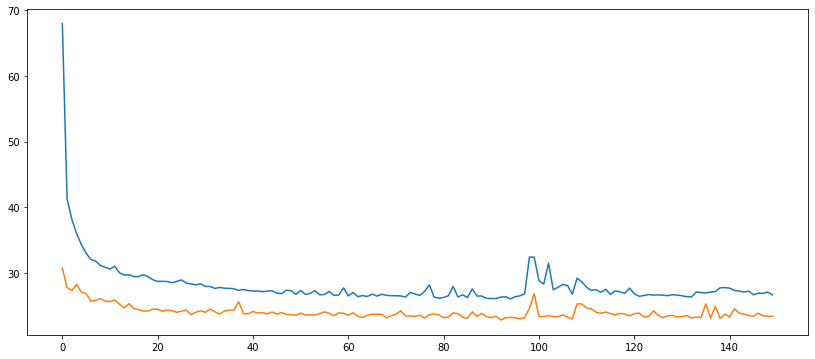

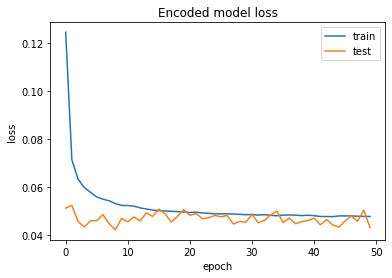

Overall accuracy of Convolutional Neural Network model: 0.9826723547690525


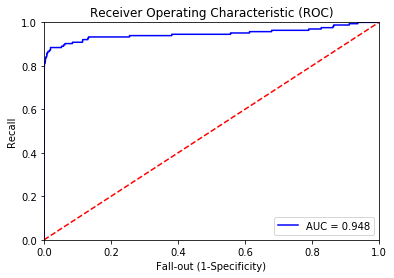

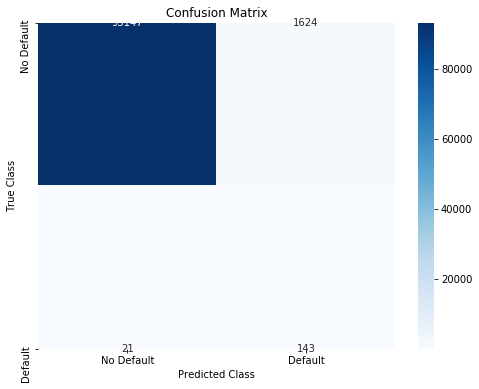

AUC(ROC): 0.9274075878928694
Precision: 0.08092812676853424
Recall: 0.8719512195121951
F1 score: 0.14810978767477992
False positives: 1624
True positives: 143
False negatives: 21
True negatives: 93147


In [6]:
encoding_dim_1 = 27
encoding_dim_2 = 24
encoding_dim_3 = 21
#encoding_dim_4 = 20
#encoding_dim_5 = 18
hidden_dim = 15 #size of the hidden layer in encoder and decoder
latent_dim = 2 #number of latent variables to learn
learning_rate = 1e-3

#Cross_Validate

kf = StratifiedKFold(3, shuffle = True, random_state=42) # Use for Kfold Validation

tn_summary=[]
fp_summary=[]
fn_summary=[]
tp_summary=[]

def Average(lst): 
    return sum(lst) / len(lst)
    

fold = 0

for train, test in kf.split(X,y):
    fold +=1
    print(f"Fold #{fold}")
    
    
    
    x_train = X[train]
    y_train = y[train]
    x_test = X[test]
    y_test = y[test]

    
    scaler = preprocessing.StandardScaler()

    x_train, x_test = scaler.fit_transform(x_train), scaler.fit_transform(x_test) 
    
    
    print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
    print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

    sm = SVMSMOTE(random_state=2)
    X_res_train, y_train_res = sm.fit_sample(x_train, y_train.ravel())

    print('After OverSampling, the shape of train_X: {}'.format(X_res_train.shape))
    print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

    print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
    print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
    
    

    input_dim = X_res_train.shape[1]
    x = input_dim

    input_layer = Input(shape=(input_dim,))

    encoder = Dense(encoding_dim_1, activation='tanh',activity_regularizer=regularizers.l1(learning_rate))(input_layer)
    encoder = BatchNormalization()(encoder)

    encoder = Dense(encoding_dim_2, activation='tanh')(encoder)
    encoder = BatchNormalization()(encoder)

    encoder = Dense(encoding_dim_3, activation='tanh')(encoder)
    encoder = BatchNormalization()(encoder)

    #encoder = Dense (encoding_dim_4, activation = 'tanh')(encoder)
    #encoder = BatchNormalization()(encoder)

    #encoder = Dense (encoding_dim_5, activation = 'tanh')(encoder)
    #encoder = BatchNormalization()(encoder)

    encoder = Dense(hidden_dim, activation='tanh' , name='encoder_hidden')(encoder)
    encoder = BatchNormalization()(encoder)

    z_mean = Dense(latent_dim, name='z_mean')(encoder)
    z_log_var = Dense(latent_dim, name='z_log_var')(encoder)
    
    def sampling(args):
        z_mean, z_log_var = args
        epsilon = K.random_normal(shape=K.shape(z_mean), mean=0., stddev=1.)
        return z_mean + K.exp(z_log_var / 2) * epsilon

    z = Lambda(sampling, name='z_sampled')([z_mean, z_log_var])
    t = BatchNormalization()(z)

    decoder1 = Dense(hidden_dim, activation='tanh')(t)
    decoder1 = BatchNormalization()(decoder1) 

    #decoder = Dense(encoding_dim_5, activation = 'tanh')(decoder)
    #decoder = BatchNormalization()(decoder)

    #decoder = Dense(encoding_dim_4, activation = 'tanh')(decoder)
    #decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_3, activation='tanh')(decoder1)
    decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_2, activation='tanh')(decoder)
    decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_1, activation='tanh')(decoder)
    decoder = BatchNormalization()(decoder)


    decoded_mean = Dense(input_dim, activation=None, name='decoded_mean')(decoder)


    vae = Model(inputs=input_layer, outputs=decoded_mean)
    
    def rec_loss(y_true, y_pred):
        return K.sum(K.square(y_true - y_pred), axis=-1)

    def kl_loss(y_true, y_pred):
        return - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)

    def vae_loss(x, decoded_mean):
        rec_loss = K.sum(K.square(x - decoded_mean), axis=-1)
        kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        return K.mean((rec_loss + kl_loss) / 2)

    vae.compile(optimizer=RMSprop(lr=learning_rate), loss=vae_loss, metrics=[rec_loss, kl_loss])
    vae.summary()
    
    n_epochs = 150
    batch_size = 128

#early_stopping = EarlyStopping(monitor='loss', patience=10, min_delta=1e-5) #stop training if loss does not decrease with at least 0.00001
#reduce_lr = ReduceLROnPlateau(monitor='loss', patience=5, min_delta=1e-5, factor=0.2) #reduce learning rate (divide it by 5 = multiply it by 0.2) if loss does not decrease with at least 0.00001

#callbacks = [reduce_lr]

#collect training data in history object
    history = vae.fit(X_res_train, X_res_train, 
                  validation_data=(x_test, x_test),
                  batch_size=batch_size,
                  shuffle = True,
                  epochs=n_epochs,
                  )
    
    
    fig = plt.figure(figsize=(14, 6))
    ax = fig.gca()
    ax.plot(history.history['rec_loss']);
    ax.plot(history.history['val_rec_loss']);
    
    
    
    # Create a separate model (encoder) in order to make encodings (first part of the autoencoder model)
    encoder_model = Model(input_layer, decoder1)
    # Create a placeholder for an encoded input
    encoded_input = Input(shape=(hidden_dim,))
    
    
    #Encode data set from above using the encoder
    encoded_train_x = encoder_model.predict(X_res_train)
    encoded_test_x = encoder_model.predict(x_test)
    #Reshape data for the CNN model
    encoded_train_x = encoded_train_x.reshape(encoded_train_x.shape[0],encoded_train_x.shape[1], 1)
    encoded_test_x = encoded_test_x.reshape(encoded_test_x.shape[0], encoded_test_x.shape[1], 1)
    encoded_train_x.shape
    
    #--------------------------------Build new model using encoded data--------------------------

    model = Sequential()
    model.add(Conv1D(32, 2, activation='relu', input_shape = encoded_train_x[1].shape))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.2))

    model.add(Conv1D(64, 2, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy',metrics=['accuracy'])
    history = model.fit(encoded_train_x, y_train_res, epochs=50,validation_data=(encoded_test_x, y_test), verbose=1)

    # Summarize history for loss
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Encoded model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    

        #---------------------------------Predictions and visuallizations-----------------------#Predict on test set
    predictions_CNN_prob = model.predict(encoded_test_x)
    predictions_CNN_prob = predictions_CNN_prob[:,0]
    predictions_CNN_01 = np.where(predictions_CNN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output
    #Print accuracy
    acc_CNN = accuracy_score(y_test, predictions_CNN_01)
    print('Overall accuracy of Convolutional Neural Network model:', acc_CNN)
    #Print Area Under Curve
    false_positive_rate, recall, thresholds = roc_curve(y_test,predictions_CNN_prob)
    roc_auc = auc(false_positive_rate, recall)
    plt.figure()
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.ylabel('Recall')
    plt.xlabel('Fall-out (1-Specificity)')
    plt.show()
    #Print Confusion Matrix
    cm = confusion_matrix(y_test, predictions_CNN_01)
    labels = ['No Default', 'Default']
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d',cmap="Blues", vmin = 0.2);
    plt.title('Confusion Matrix')
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()


    print("AUC(ROC): " + str(metrics.roc_auc_score(y_test, predictions_CNN_01)))
    print("Precision: " + str(metrics.precision_score(y_test, predictions_CNN_01)))
    print("Recall: " + str(metrics.recall_score(y_test, predictions_CNN_01)))
    print("F1 score: " + str(metrics.f1_score(y_test, predictions_CNN_01)))

    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions_CNN_01).ravel()

    print("False positives: " + str(fp))
    print("True positives: " + str(tp))
    print("False negatives: " + str(fn))
    print("True negatives: " + str(tn))
    

    tn_summary.append(tn)
    fp_summary.append(fp)
    fn_summary.append(fn)
    tp_summary.append(tp)
    

      

In [7]:

print("Average tn = " + str(Average(tn_summary)))
print("Average fp = " + str(Average(fp_summary)))
print("Average fn = "+ str(Average(fn_summary)))    
print("Average tp = "+ str(Average(tp_summary)))   


Average_precision = Average(tp_summary)/(Average(tp_summary)+Average(fp_summary))
Average_recall = Average(tp_summary)/(Average(tp_summary)+Average(fn_summary))
Average_f1_score = 2*Average_precision*Average_recall/(Average_precision + Average_recall)

print("Average Precision = {:0.2f}%".format(Average_precision*100))

print("Average Recall = {:0.2f}%".format(Average_recall*100))

print("Average F1 score = {:0.2f}%".format(Average_f1_score*100))

Average tn = 93455.66666666667
Average fp = 1316.0
Average fn = 20.333333333333332
Average tp = 143.66666666666666
Average Precision = 9.84%
Average Recall = 87.60%
Average F1 score = 17.70%


In [8]:
total_tn=0
total_fp=0
total_fn=0
total_tp=0

for i in tn_summary:
    total_tn = total_tn + i

for j in fp_summary:
    total_fp = total_fp + j
    
for x in fn_summary:
    total_fn = total_fn + x
    
for y in tp_summary:
    total_tp = total_tp + y

print(" Total tn: " + str(total_tn))
print("Total fp: " + str(total_fp))
print(" Total fn:" + str(total_fn))
print(" Total tp:" + str(total_tp))


Total_Precision = total_tp/(total_tp + total_fp)
Total_Recall = total_tp/(total_tp+ total_fn)

Total_F1_score = 2*Total_Precision*Total_Recall/(Total_Precision + Total_Recall)

print("Total Precision = " + str(Total_Precision))
print("Total Recall = " + str(Total_Recall))
print("Total F1_score = " + str(Total_F1_score))
    


 Total tn: 280367
Total fp: 3948
 Total fn:61
 Total tp:431
Total Precision = 0.09842429778488239
Total Recall = 0.8760162601626016
Total F1_score = 0.17696571545883802
